<a href="https://colab.research.google.com/github/Ezzeldin-nasser939/Predict_age_race_gender_from_Image/blob/main/Predict_age_race_gender_from_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import opendatasets as od
from pathlib import Path
from PIL import Image


In [3]:
od.download("https://www.kaggle.com/datasets/jangedoo/utkface-new")

Skipping, found downloaded files in "./utkface-new" (use force=True to force download)


In [4]:
def imgs(path):
  imgs = []
  files =Path(path).glob('*')
  for myFile in files:
    img_name = str(myFile)[29:]
    age_gender_ethnicity = img_name.split('_')
    if len(age_gender_ethnicity) == 4 :
       img=Image.open(myFile)
      # img = img.convert('LA')
       img=img.resize((74,74))
       img=np.array(img)
       img = img/255
       imgs.append(img)
  return(imgs)

In [5]:
def ages(path):
  age=[]
  files =Path(path).glob('*')
  for myFile in files:
    img_name = str(myFile)[29:]
    age_gender_ethnicity = img_name.split('_')
    if len(age_gender_ethnicity) == 4 :
      age.append(age_gender_ethnicity[0])
  return(age)

In [6]:
def genders(path):
  gender=[]
  files =Path(path).glob('*')
  for myFile in files:
    img_name = str(myFile)[29:]
    age_gender_ethnicity = img_name.split('_')
    if len(age_gender_ethnicity) == 4 :
      gender.append(age_gender_ethnicity[1])
  return(gender)

In [7]:
def ethnicity(path):
  ethnicity = []
  files =Path(path).glob('*')
  for myFile in files:
    img_name = str(myFile)[29:]
    age_gender_ethnicity = img_name.split('_')
    if len(age_gender_ethnicity) == 4 :
      ethnicity.append(age_gender_ethnicity[2])
  return(ethnicity)

In [8]:
train_img=np.array(imgs('/content/utkface-new/UTKFace'))
train_age=ages('/content/utkface-new/UTKFace')
train_gender=genders('/content/utkface-new/UTKFace')
train_ethnicity=ethnicity('/content/utkface-new/UTKFace')

In [9]:
train_img.shape

(23705, 74, 74, 3)

In [10]:
print(np.unique(train_age))

['1' '10' '100' '101' '103' '105' '11' '110' '111' '115' '116' '12' '13'
 '14' '15' '16' '17' '18' '19' '2' '20' '21' '22' '23' '24' '25' '26' '27'
 '28' '29' '3' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '4' '40'
 '41' '42' '43' '44' '45' '46' '47' '48' '49' '5' '50' '51' '52' '53' '54'
 '55' '56' '57' '58' '59' '6' '60' '61' '62' '63' '64' '65' '66' '67' '68'
 '69' '7' '70' '71' '72' '73' '74' '75' '76' '77' '78' '79' '8' '80' '81'
 '82' '83' '84' '85' '86' '87' '88' '89' '9' '90' '91' '92' '93' '95' '96'
 '99']


In [11]:
print(np.unique(train_gender))

['0' '1']


In [12]:
print(np.unique(train_ethnicity))

['0' '1' '2' '3' '4']


In [13]:
print(type(train_age[0]))

<class 'str'>


In [14]:
len(train_age)

23705

In [15]:
print(type(train_gender[0]))

<class 'str'>


In [16]:
len(train_gender)

23705

In [17]:
print(type(train_ethnicity[0]))

<class 'str'>


In [18]:
len(train_ethnicity)

23705

In [19]:
len(train_img)

23705

In [20]:
train_img[0]

array([[[0.01568627, 0.        , 0.00392157],
        [0.01568627, 0.00392157, 0.00784314],
        [0.01568627, 0.00784314, 0.01176471],
        ...,
        [0.1372549 , 0.1372549 , 0.14509804],
        [0.03921569, 0.03921569, 0.04705882],
        [0.00392157, 0.00392157, 0.01176471]],

       [[0.00784314, 0.        , 0.        ],
        [0.00784314, 0.        , 0.00392157],
        [0.00784314, 0.00392157, 0.00784314],
        ...,
        [0.1254902 , 0.1254902 , 0.13333333],
        [0.02352941, 0.02352941, 0.03137255],
        [0.01176471, 0.01176471, 0.01960784]],

       [[0.00392157, 0.        , 0.        ],
        [0.00392157, 0.        , 0.        ],
        [0.        , 0.00392157, 0.00392157],
        ...,
        [0.05490196, 0.05882353, 0.06666667],
        [0.00392157, 0.00392157, 0.01176471],
        [0.01176471, 0.01176471, 0.01960784]],

       ...,

       [[0.03137255, 0.03921569, 0.05490196],
        [0.08627451, 0.10196078, 0.11372549],
        [0.17254902, 0

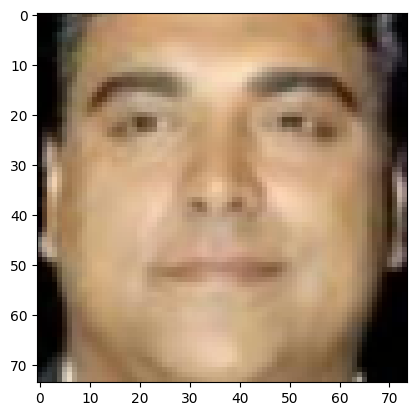

In [21]:
plt.imshow(train_img[0])

In [22]:
train_age_cat=list(map(int, train_age))

In [23]:
for i in range(len(train_age)):
  if train_age_cat[i]<=10:
    train_age_cat[i] = 0
  if train_age_cat[i]>10 and train_age_cat[i] < 21:
    train_age_cat[i] = 1
  if train_age_cat[i]>20 and train_age_cat[i] < 31:
    train_age_cat[i] = 2
  if train_age_cat[i]>30 and train_age_cat[i] < 51:
    train_age_cat[i] = 3
  if train_age_cat[i]>50 and train_age_cat[i] < 71:
    train_age_cat[i] = 4
  if train_age_cat[i]>70 and train_age_cat[i] < 91:
    train_age_cat[i] = 5
  if train_age_cat[i]>90:
    train_age_cat[i] = 6



# # 0 -> '1 - 10'
# # 1 -> '11 - 20'
# # 2 -> '21 - 30'
# # 3 -> '31 - 50'
# # 4 -> '51 - 70'
# # 5 -> '71 - 90'
# # 6 -> '+90'

In [25]:
train_age_cat=np.array(train_age_cat)
train_gender=np.array(train_gender)
train_ethnicity=np.array(train_ethnicity)

Split Data to Train and Test

In [32]:
x_train, x_test, age_y_train, age_y_test, gender_y_train, gender_y_test, race_y_train, race_y_test = train_test_split(train_img, train_age_cat, train_gender, train_ethnicity,test_size=0.2,random_state=45)

In [27]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(74, 74, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(1024, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(7, activation='softmax'))

agemodel.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],
             optimizer=tf.keras.optimizers.Adam(lr=0.001))

agemodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 72, 72, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [ ]:
agemodel.fit(x_train, age_y_train, epochs=20, validation_data=(x_test, age_y_test))

In [ ]:
pred = agemodel.predict(x_test)

In [ ]:
for i in range(len(pred)):
  print(age_y_test[i], tf.argmax(pred[i]), sep='  //////  ')

In [ ]:
len(pred)

In [ ]:
genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(74, 74, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid'))

genmodel.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             metrics=['accuracy'])

In [ ]:
genmodel.fit(x_train, gender_y_train, epochs=20, validation_data=(x_test, gender_y_test))

In [ ]:
pred = agemodel.predict(x_test)

In [ ]:
for i in range(len(pred)):
  print(gender_y_test[i], tf.argmax(pred[i]), sep='  //////  ')

In [ ]:
len(pred)

In [ ]:
racemodel = Sequential()
racemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(74, 74, 3)))
racemodel.add(MaxPooling2D((2,2)))
racemodel.add(Conv2D(64, (3,3), activation='relu'))
racemodel.add(MaxPooling2D((2,2)))
racemodel.add(Conv2D(128, (3,3), activation='relu'))
racemodel.add(MaxPooling2D((2,2)))
racemodel.add(Flatten())
racemodel.add(Dense(64, activation='relu'))
racemodel.add(Dropout(0.5))
racemodel.add(Dense(5, activation='softmax'))

racemodel.compile(loss='sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=['accuracy'])

In [ ]:
racemodel.fit(x_train, race_y_train, epochs=20, validation_data=(x_test, race_y_test))

In [ ]:
pred = agemodel.predict(x_test)

In [ ]:
for i in range(len(pred)):
  print(race_y_test[i], tf.argmax(pred[i]), sep='  //////  ')

In [ ]:
len(pred)

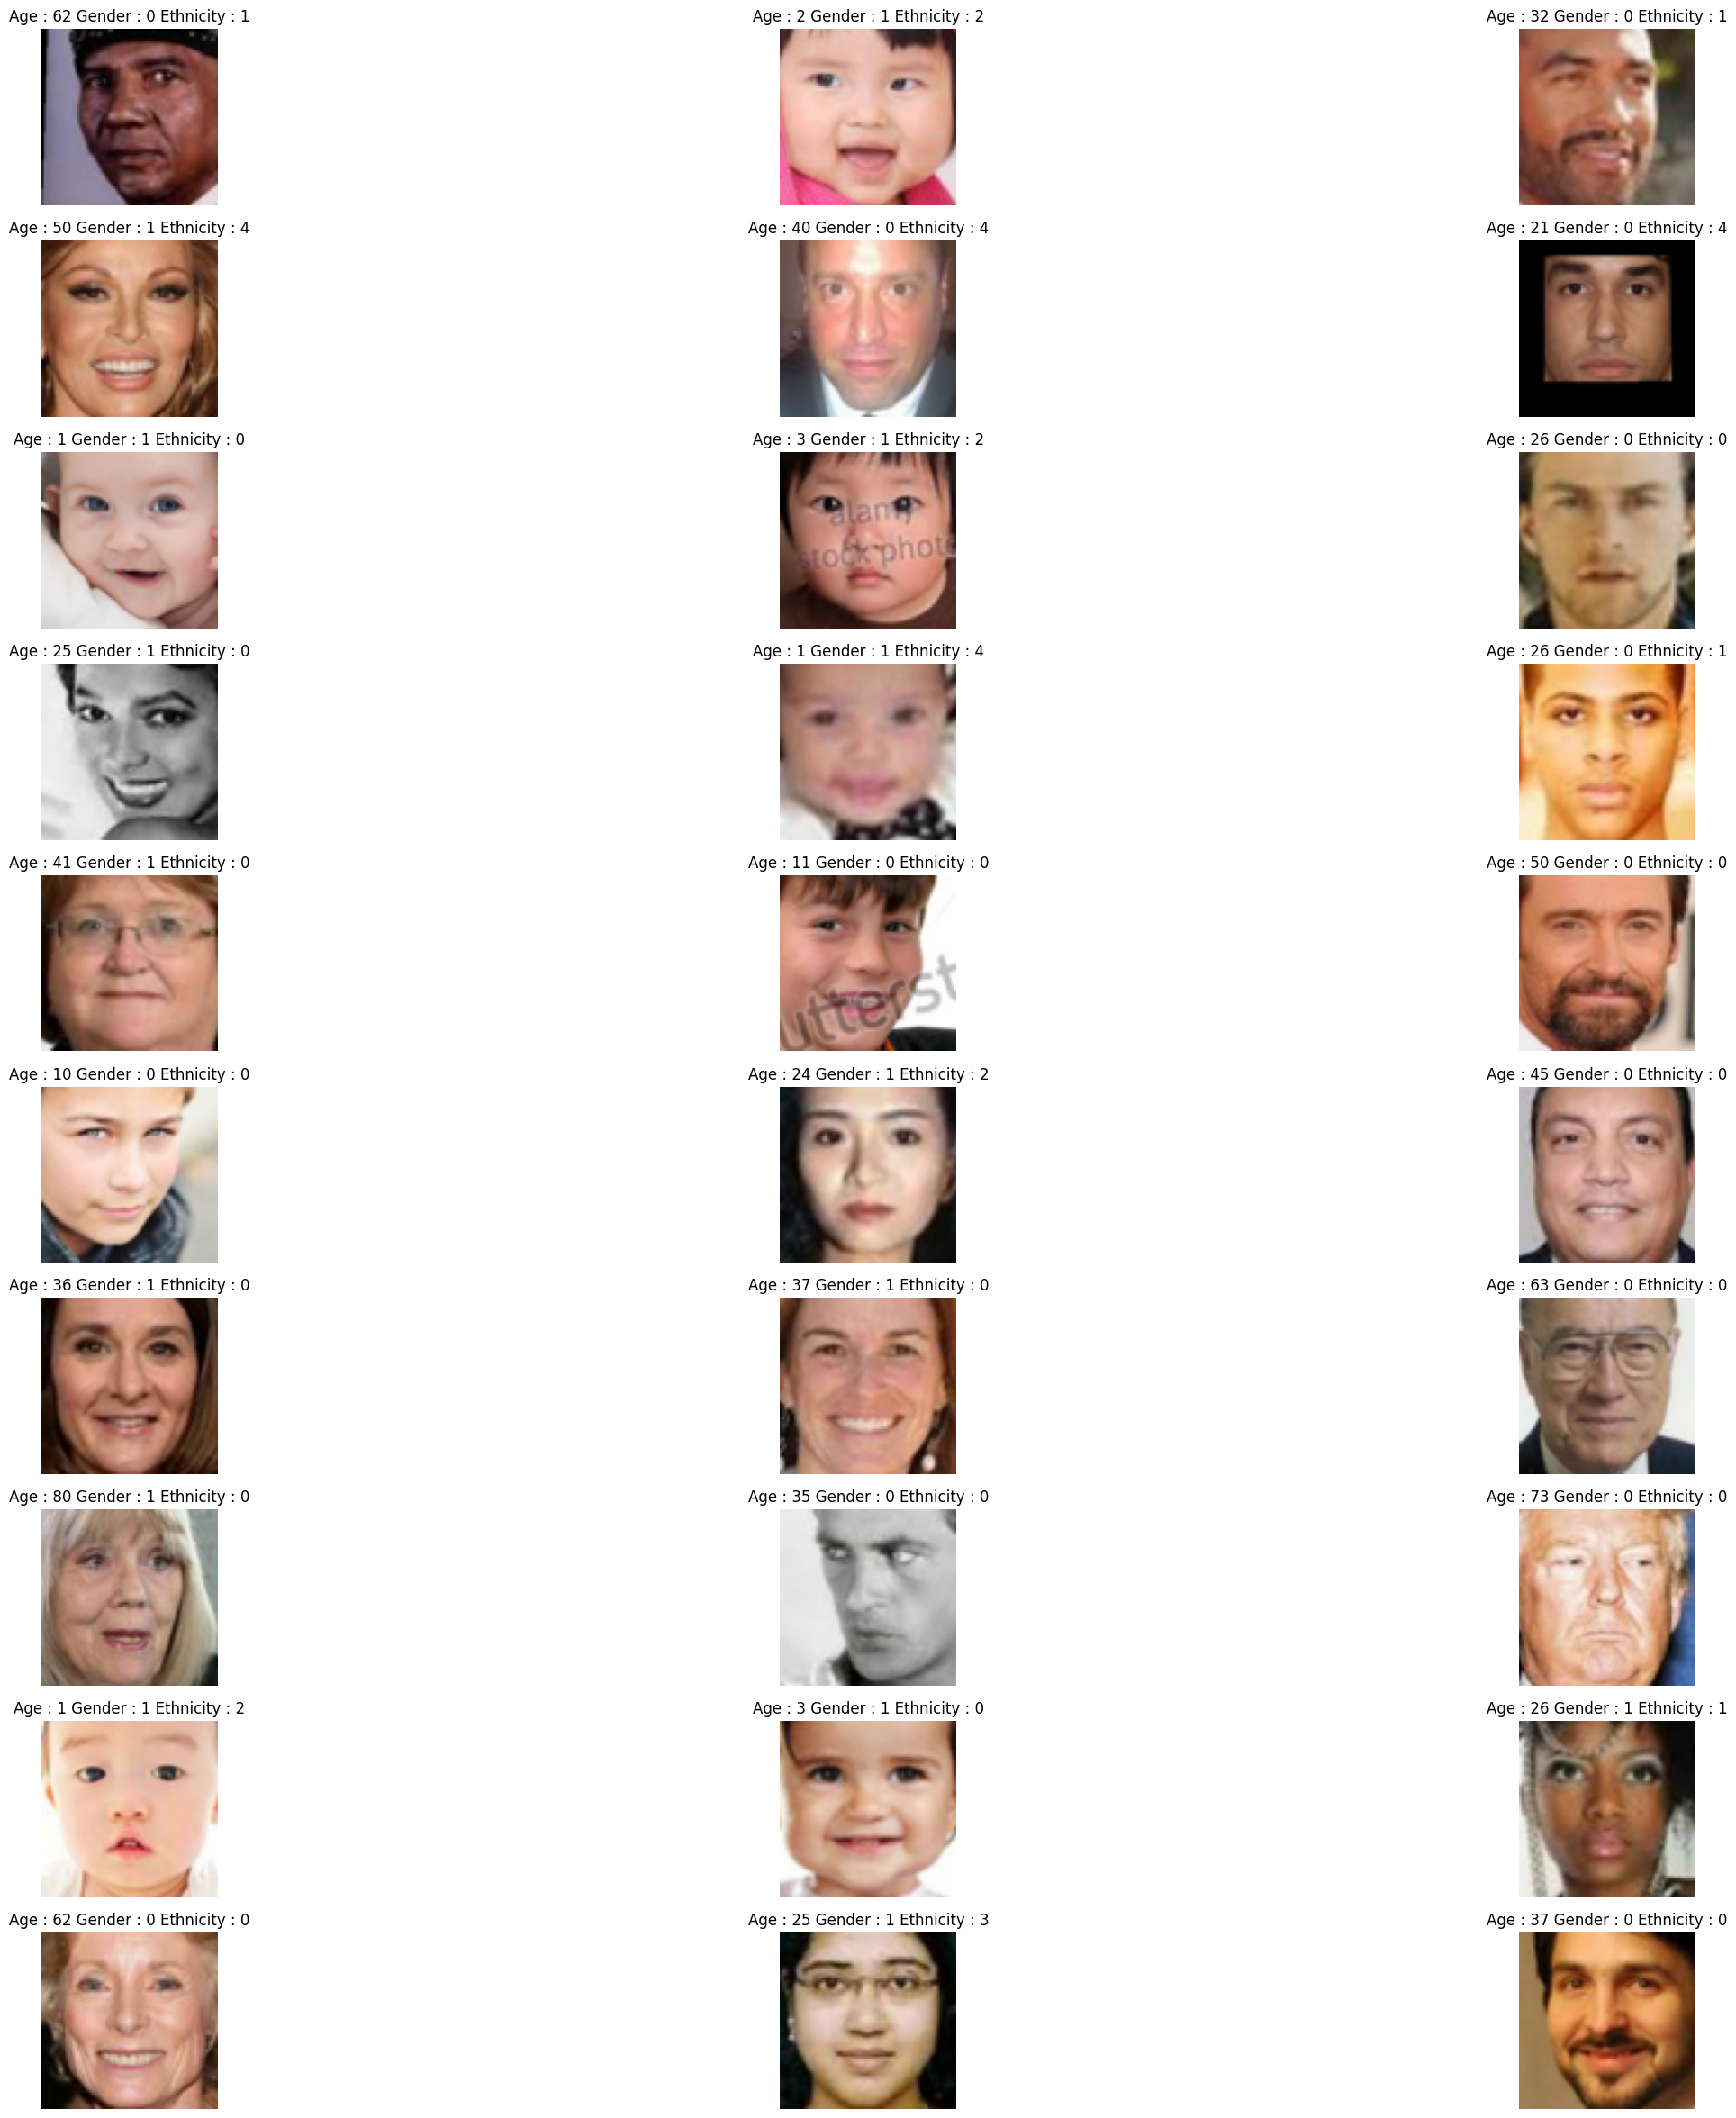

In [49]:
import cv2
from matplotlib import pyplot as plt

# create figure
fig = plt.figure(figsize=(30, 30))

columns = 3
rows = 10

for i in range(1, columns*rows+1 ):
    fig.add_subplot(rows, columns, i)
    plt.title(
      "Age : "+str(train_age[i])+
      " Gender : "+train_gender[i]+
      " Ethnicity : "+str(train_ethnicity[i])
    )
    plt.imshow(train_img[i])
    plt.axis('off')

plt.show()

